# 作業 : (Kaggle)鐵達尼生存預測

# [作業目標]
- 試著模仿範例寫法, 在鐵達尼生存預測中, 練習特徵重要性的寫作與觀察

# [作業重點]
- 仿造範例, 完成特徵重要性的計算, 並觀察對預測結果的影響 (In[3]~[5], Out[3]~[5]) 
- 仿造範例, 將兩個特徵重要性最高的特徵重組出新特徵, 並觀察對預測結果的影響 (In[8], Out[8]) 

In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

data_path = '../data/'
df = pd.read_csv(data_path + 'titanic_train.csv')

train_Y = df['Survived']
df = df.drop(['PassengerId', 'Survived'] , axis=1)
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# 因為需要把類別型與數值型特徵都加入, 故使用最簡版的特徵工程
LEncoder = LabelEncoder()
MMEncoder = MinMaxScaler()
for c in df.columns:
    if df[c].dtype == 'object': 
        df[c] = df[c].fillna('None')
        df[c] = LEncoder.fit_transform(df[c]) 
    else: 
        df[c] = df[c].fillna(-1)
df[c] = MMEncoder.fit_transform(df[c].values.reshape(-1, 1))
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,108,1,22.0,1,0,523,7.2500,146,1.0
1,1,190,0,38.0,1,0,596,71.2833,81,0.0
2,3,353,0,26.0,0,0,669,7.9250,146,1.0
3,1,272,0,35.0,1,0,49,53.1000,55,1.0
4,3,15,1,35.0,0,0,472,8.0500,146,1.0


In [3]:
# 梯度提升樹擬合後, 將結果依照重要性由高到低排序 (note : D27作業中'Ticket'是第一名特徵, 'Age'是數值特徵中排名最高者)
estimator = GradientBoostingClassifier()
estimator.fit(df.values, train_Y)
feats = pd.Series(data=estimator.feature_importances_, index=df.columns)
feats = feats.sort_values(ascending=False)
feats

Sex         0.441108
Pclass      0.110959
Ticket      0.104213
Fare        0.086256
Cabin       0.080735
Name        0.076876
Age         0.068004
Parch       0.011878
Embarked    0.010747
SibSp       0.009224
dtype: float64

## 先用梯度提升機對鐵達尼生存預測做訓練，再用其特徵重要性回答下列問題

# 作業1
* 將特徵重要性較低的一半特徵刪除後，再做生存率預估，正確率是否有變化?

In [4]:
# 原始特徵 + 梯度提升樹
train_X = MMEncoder.fit_transform(df)
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8193184804384159

In [5]:
# 高重要性特徵 + 梯度提升樹 
"""
Your Code Here
"""
high_feature=list(feats[:8].index)
train_X = MMEncoder.fit_transform(df[high_feature])
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8137380944021659

# 作業2
* 將特徵重要性最高的兩個特徵做特徵組合，是否能再進一步提升預測力?

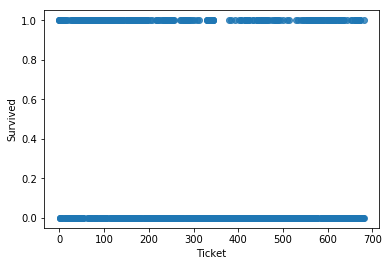

In [6]:
# 觀察重要特徵與目標的分布
# 第一名 : Ticket              
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x=df['Ticket'], y=train_Y, fit_reg=False)
plt.show()

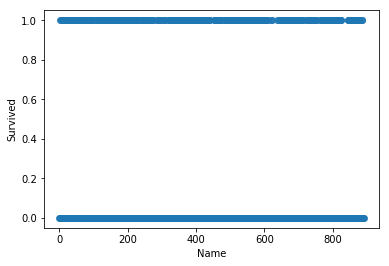

In [7]:
# 第二名 : Name        
sns.regplot(x=df['Name'], y=train_Y, fit_reg=False)
plt.show()

In [8]:
# 製作新特徵看效果
"""
Your Code Here
"""
df_test=df.copy()
#df_test["add_TN"]=(df_test["Ticket"]+df["Name"])/2
df_test["multi_TN"]= (df_test["Ticket"]*df["Name"])
#df_test["add_SP"]=(df_test["Sex"]+df["Pclass"])/2
df_test["multi_SP"]= (df_test["Sex"]*df["Pclass"])


train_X = MMEncoder.fit_transform(df_test)
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0.8316531355027881